In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [3]:
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)
cf.go_offline()
import folium
from plotly.subplots import make_subplots
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# data from kaggle
df_new = pd.read_csv("covid_19_india.csv")
df_data = df_new.groupby("State/UnionTerritory").sum()
df_data.drop("Sno",inplace=True,axis=1)
df_data.reset_index(inplace=True)
df_data

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,430671,6420,483761
1,Andhra Pradesh,76025563,715536,84815303
2,Arunachal Pradesh,1084070,3268,1314087
3,Assam,18920926,85655,21703581
4,Bihar,21690764,121993,23891385
5,Cases being reassigned to states,0,0,345565
6,Chandigarh,1181720,20455,1387878
7,Chandigarh***,14381,246,15636
8,Chhattisgarh,13106333,170085,16051609
9,Dadar Nagar Haveli,14,0,186


In [5]:
df = pd.DataFrame()
df[["Name of State / UT","Cured","Death","Total Cases"]]= df_data[["State/UnionTerritory","Cured","Deaths","Confirmed"]]
df

,Name of State / UT,Cured,Death,Total Cases
0,Andaman and Nicobar Islands,430671,6420,483761
1,Andhra Pradesh,76025563,715536,84815303
2,Arunachal Pradesh,1084070,3268,1314087
3,Assam,18920926,85655,21703581
4,Bihar,21690764,121993,23891385
5,Cases being reassigned to states,0,0,345565
6,Chandigarh,1181720,20455,1387878
7,Chandigarh***,14381,246,15636
8,Chhattisgarh,13106333,170085,16051609
9,Dadar Nagar Haveli,14,0,186


In [6]:
total_cases_overall=df['Total Cases'].sum()
print('The total number of cases till now in India is ',total_cases_overall)

The total number of cases till now in India is  853283429


In [7]:
df['Active Cases']=df['Total Cases']-(df['Death']+df['Cured'])
df

,Name of State / UT,Cured,Death,Total Cases,Active Cases
0,Andaman and Nicobar Islands,430671,6420,483761,46670
1,Andhra Pradesh,76025563,715536,84815303,8074204
2,Arunachal Pradesh,1084070,3268,1314087,226749
3,Assam,18920926,85655,21703581,2697000
4,Bihar,21690764,121993,23891385,2078628
5,Cases being reassigned to states,0,0,345565,345565
6,Chandigarh,1181720,20455,1387878,185703
7,Chandigarh***,14381,246,15636,1009
8,Chhattisgarh,13106333,170085,16051609,2775191
9,Dadar Nagar Haveli,14,0,186,172


In [8]:
df.style.background_gradient(cmap='RdYlGn_r')

,Name of State / UT,Cured,Death,Total Cases,Active Cases
0,Andaman and Nicobar Islands,430671,6420,483761,46670
1,Andhra Pradesh,76025563,715536,84815303,8074204
2,Arunachal Pradesh,1084070,3268,1314087,226749
3,Assam,18920926,85655,21703581,2697000
4,Bihar,21690764,121993,23891385,2078628
5,Cases being reassigned to states,0,0,345565,345565
6,Chandigarh,1181720,20455,1387878,185703
7,Chandigarh***,14381,246,15636,1009
8,Chhattisgarh,13106333,170085,16051609,2775191
9,Dadar Nagar Haveli,14,0,186,172


In [9]:
Total_Active_Cases=df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases

,Total Cases
Name of State / UT,
Maharashtra,179450627
Andhra Pradesh,84815303
Tamil Nadu,82789540
Karnataka,79354749
Uttar Pradesh,50283822
Delhi,46445978
West Bengal,38349942
Kerala,36407056
Odisha,27395482


In [10]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,179450627
Andhra Pradesh,84815303
Tamil Nadu,82789540
Karnataka,79354749
Uttar Pradesh,50283822
Delhi,46445978
West Bengal,38349942
Kerala,36407056
Odisha,27395482


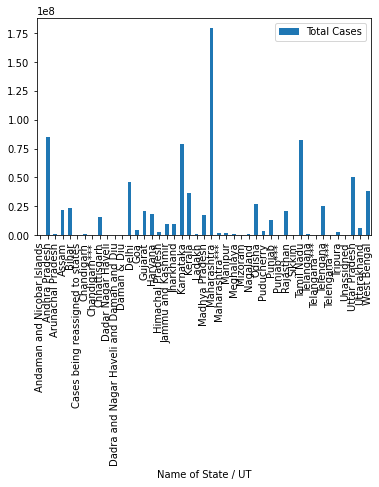

In [11]:
# static plot 
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()

In [12]:
# interactive plot 
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

In [13]:
# interactive plot 2
px.bar(df,x='Name of State / UT',y='Total Cases')

In [14]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=2)
px.scatter(df,x='Name of State / UT',y='Total Cases')

In [5]:
Indian_Cord=pd.read_excel(r"Indian Coordinates.xlsx")
Indian_Cord

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN
5,Chandigarh,30.719997,76.780006,NaN
6,Chhattisgarh,22.090420,82.159987,NaN
7,Dadra And Nagar Haveli,20.266578,73.016618,NaN
8,Delhi,28.669993,77.230004,NaN
9,Goa,15.491997,73.818001,NaN


In [22]:
df_full=pd.merge(Indian_Cord,df,on='Name of State / UT')
df_full

,Name of State / UT,Latitude,Longitude,Unnamed: 3,Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,NaN,76025563,715536,84815303,8074204
1,Delhi,28.669993,77.230004,NaN,40752525,931396,46445978,4762057
2,Haryana,28.450006,77.019991,NaN,15801049,194907,18060806,2064850
3,Karnataka,12.570381,76.919997,NaN,67314778,1144931,79354749,10895040
4,Kerala,8.900373,76.569993,NaN,28915377,132008,36407056,7359671
5,Maharashtra,19.250232,73.160175,NaN,146212339,5068405,179450627,28169883
6,Punjab,31.519974,75.980003,NaN,11408678,403512,13339280,1527090
7,Rajasthan,26.449999,74.639981,NaN,17963398,230703,20941444,2747343
8,Telengana,18.112400,79.019300,NaN,21762057,149324,24886079,2974698
9,Tamil Nadu,12.920386,79.150042,NaN,74243503,1291048,82789540,7254989


In [33]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.0000006,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [34]:
map

In [15]:
dbd_India=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [7]:
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


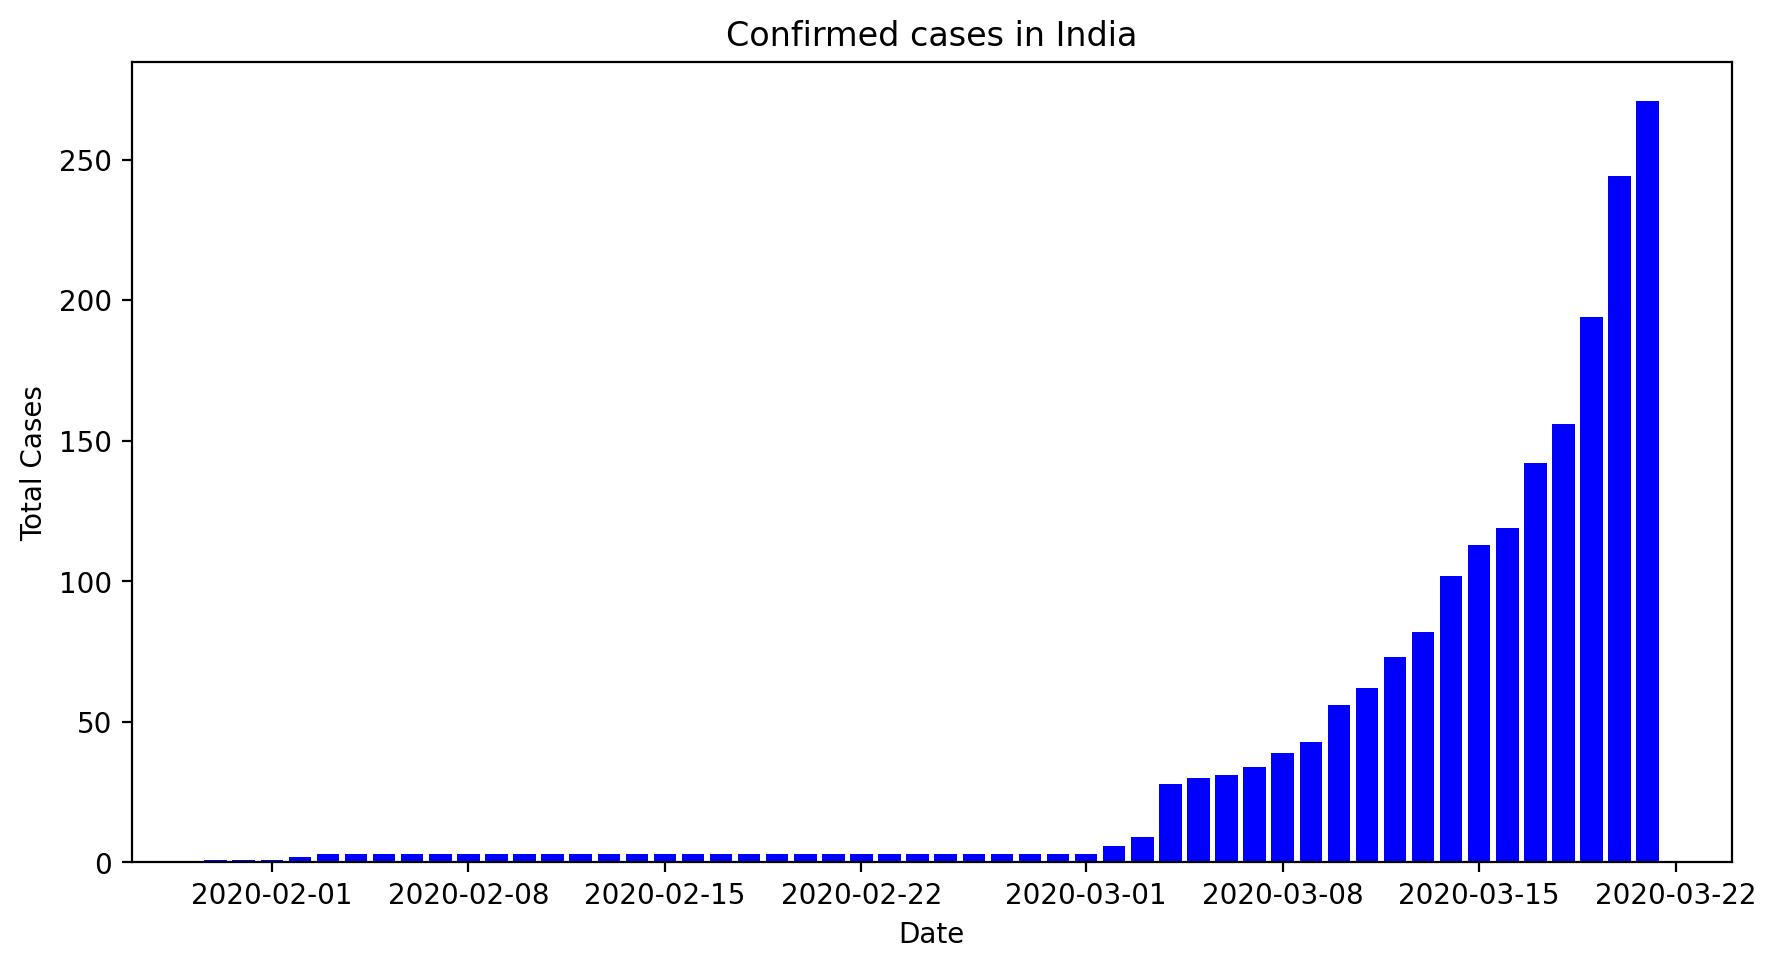

In [33]:
#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()

In [34]:
#plotly Express
fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [35]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

In [39]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [8]:
df_1=pd.read_csv(r"covid_19_data.csv",parse_dates=['Last Update'])
df_1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [42]:
df_1.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [43]:
df_1.groupby("Date").sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [44]:
confirmed=df_1.groupby('Date').sum()['Confirmed'].reset_index()
death=df_1.groupby('Date').sum()['Deaths'].reset_index()
rec=df_1.groupby('Date').sum()['Recovered'].reset_index()

In [45]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))